In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.stats as st

from sklearn import datasets

# Тестване на Хипотези - демонстрации

## Heights

In [5]:
heights = pd.read_csv("heights.csv")

In [6]:
plt.hyst

,Height
0,156
1,163
2,169
3,161
4,154


## Grain

Годишен добив на зърно от 2 ниви.

Но: средният добив попринцип на двете ниви е равен.

На: средния добив попринцип е различен.

За да отхвърлим или неуспеем да отхвърлим Но правим измерване на извадка на добивите от 7 години: 1912 до 1918. На базата на данните от извадката правим заключение за попринцип.

In [22]:
grain = pd.read_csv("grain_data.csv", sep='\t')

In [27]:
grain

,Year,GreatNorthern,BigFour
0,1912,71.0,54.7
1,1913,73.9,60.6
2,1914,48.9,45.1
3,1915,78.9,71.0
4,1916,43.5,40.9
5,1917,47.9,45.4
6,1918,63.0,53.4
7,1919,48.4,41.2
8,1920,48.1,44.8


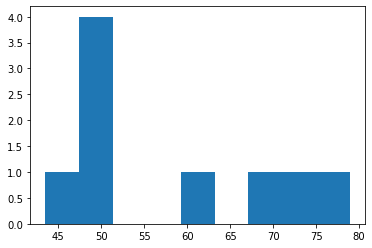

In [24]:
plt.hist(grain.GreatNorthern, bins = grain.GreatNorthern.size)
plt.show()

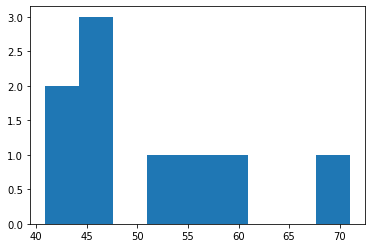

In [25]:
plt.hist(grain.BigFour, bins = grain.BigFour.size)
plt.show()

In [26]:
grain.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9.0,1916.000000,2.738613,1912.0,1914.0,1916.0,1918.0,1920.0
GreatNorthern,9.0,58.177778,13.548872,43.5,48.1,48.9,71.0,78.9
BigFour,9.0,50.788889,10.086308,40.9,44.8,45.4,54.7,71.0


In [19]:
st.ttest_ind(grain.GreatNorthern, grain.BigFour)

Ttest_indResult(statistic=1.312336706487564, pvalue=0.20792200785311768)

## Exploring Iris

In [52]:
iris_dataset = datasets.load_iris()

In [85]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [79]:
data = iris_dataset.data
columns = iris_dataset.feature_names
target = iris_dataset.target

data_and_target = np.concatenate((data, target.reshape((-1, 1))), axis = 1)

In [81]:
iris = pd.DataFrame(data = data_and_target, columns=[*columns, 'target'])

In [82]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


$H_0$: $\mu_\text{sepal length, setosa} = \mu_\text{sepal length, versicolor}$
The mean sepal len for the first two iris species is equal.

$H_1$: $\mu_\text{sepal length, setosa} \neq \mu_\text{sepal length, versicolor}$
The mean sepal len for the first two iris species is different.


In [90]:
a = iris[iris.target == 0]['sepal length (cm)']
b = iris[iris.target == 1]['sepal length (cm)']
st.ttest_ind(a, b)

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487077e-18)

In [92]:
a = iris[iris.target == 0]['sepal length (cm)']
b = iris[iris.target == 2]['sepal length (cm)']
st.ttest_ind(a, b)

Ttest_indResult(statistic=-15.386195820079404, pvalue=6.892546060674059e-28)

In [97]:
a = iris[iris.target == 1]['sepal length (cm)']
b = iris[iris.target == 2]['sepal length (cm)']
st.ttest_ind(a, b).pvalue

1.7248563024547942e-07

In [100]:
iris['sepal_area'] = iris["sepal length (cm)"] * iris["sepal width (cm)"]

In [101]:
for i, j in [(0, 1), (0, 2), (1, 2)]:
    a = iris[iris.target == i]['sepal_area']
    b = iris[iris.target == j]['sepal_area']
    p_value = st.ttest_ind(a, b).pvalue
    print(f'{iris_dataset.target_names[i]} and {iris_dataset.target_names[j]}: p value = {p_value}')

setosa and versicolor: p value = 0.2102478072252654
setosa and virginica: p value = 0.00026621177924123103
versicolor and virginica: p value = 2.829632841905837e-06


## Light bulbs

In [30]:
x = np.linspace(350, 650, 1000)
pdf = st.norm.pdf(x, loc=500, scale=50)

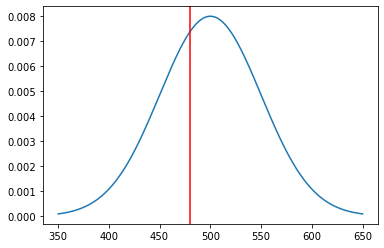

In [31]:
plt.plot(x, pdf)
plt.axvline(480, c='red')
plt.show()

In [32]:
# PDF of the distribution of means of samples with n=25
pdf_of_sample_means = st.norm.pdf(x, loc=500, scale=50/np.sqrt(25))

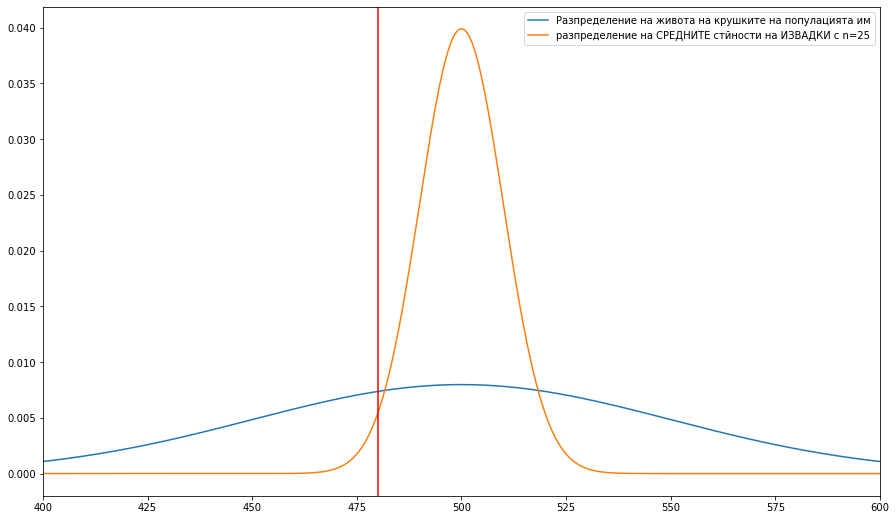

In [36]:
plt.figure(figsize=(15, 9))
plt.plot(x, pdf, label="Разпределение на живота на крушките на популацията им")
plt.plot(x, pdf_of_sample_means, label="разпределение на СРЕДНИТЕ стйности на ИЗВАДКИ с n=25")

plt.axvline(480, c='red')
plt.xlim((400, 600))
plt.legend()
plt.show()

In [37]:
st.norm.cdf(480, loc=500, scale=50/np.sqrt(25))

0.022750131948179195

In [40]:
Z = (480 - 500) / (50 / np.sqrt(25))
Z

-2.0

In [11]:
dice_roll = np.random.randint(1,7,size = (25))

In [12]:
sorted(dice_roll)

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6]

In [13]:
np.random.rand(20)*100

array([40.60256863, 12.51723809, 16.58133015,  9.95858721, 67.30967174,
       46.54867689, 59.95356295, 63.91866304, 40.19979972, 96.32878211,
        0.29409957, 14.08631449, 72.61829575, 77.76166416, 13.00568877,
       19.38125014, 86.64534039,  7.98283812, 82.42102166, 93.95538493])

## Доварителен интервал
Какъв доварителен интервал мога да дам за доварително ниво 95%?

In [3]:
heights = pd.read_csv('heights.csv')
heights

,Height
0,156
1,163
2,169
3,161
4,154
...,...
346,159
347,170
348,160
349,152


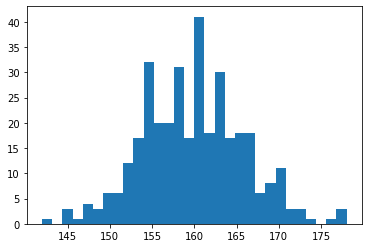

In [10]:
plt.hist(heights, bins=30)
plt.show()

In [11]:
st.norm.pdf(167, loc=heights.Height.mean(), scale=heights.Height.std())

0.032272782138318024

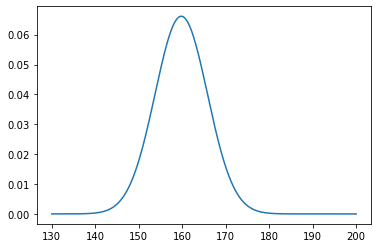

In [9]:
confidence_interal = 0.95
# st.norm.pdf(167, loc=heights.Height.mean(), scale=heights.Height.std())
x = np.linspace(130, 200, 1000)
y = st.norm.pdf(x, loc=heights.Height.mean(), scale=heights.Height.std())
plt.plot(x,y)
plt.show()

In [12]:
Z = (heights.Height - heights.Height.mean()) / heights.Height.std()

In [13]:
Z

0     -0.626052
1      0.534861
2      1.529928
3      0.203171
4     -0.957741
         ...   
346   -0.128518
347    1.695773
348    0.037327
349   -1.289430
350   -1.123585
Name: Height, Length: 351, dtype: float64

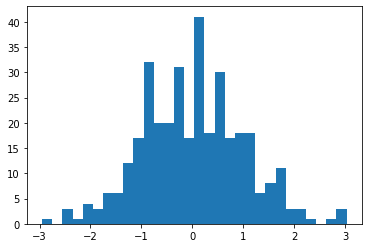

In [15]:
plt.hist(Z, bins=30)
plt.show()

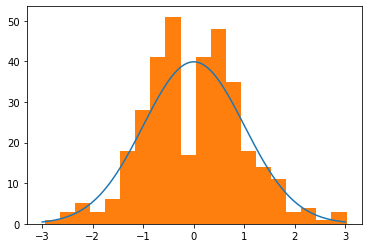

In [14]:
x = np.linspace(-3, 3, 1000)
y = 100 * st.norm.pdf(x)
plt.plot(x,y)
plt.hist(Z, bins=20)
plt.show()

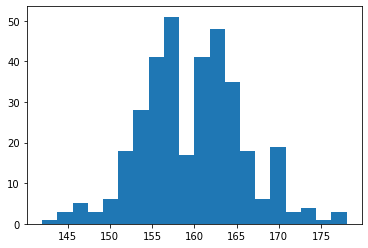

In [19]:
plt.hist(heights, bins=20)
plt.show()